In [1]:
import json
from collections import defaultdict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm.auto import tqdm

from scipy import stats

In [2]:
c = 1 / np.log(2)

In [3]:
data_scaling_alphas = []
data_scaling_Ds = []
data_scaling_losses = []
data_scaling_subtask_losses = dict()
for i in tqdm(range(1, 31, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-1/{i}/config.json", 'r') as f:
            config = json.load(f)
            data_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-1/{i}/info.json", 'r') as f:
            info = json.load(f)
            min_idx = min(list(range(len(info['losses']))), key=lambda i: info['losses'][i])
            data_scaling_losses.append(info['losses'][min_idx]*c)
            data_scaling_subtask_losses[info['D']] = [info['losses_subtasks'][str(i)][min_idx]*c for i in range(200)]
            data_scaling_Ds.append(info['D'])
    except Exception as e:
        print(e)
        
for i in tqdm(range(1, 7, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-5/{i}/config.json", 'r') as f:
            config = json.load(f)
            data_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-5/{i}/info.json", 'r') as f:
            info = json.load(f)
            min_idx = min(list(range(len(info['losses']))), key=lambda i: info['losses'][i])
            data_scaling_losses.append(info['losses'][min_idx]*c)
            data_scaling_subtask_losses[info['D']] = [info['losses_subtasks'][str(i)][min_idx]*c for i in range(200)]
            data_scaling_Ds.append(info['D'])
    except Exception as e:
        print(e)

assert all([x == data_scaling_alphas[0] for x in data_scaling_alphas])
data_scaling_alpha = data_scaling_alphas[0]


  0%|          | 0/30 [00:00<?, ?it/s]

'losses'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/24/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/25/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/26/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/27/info.json'
'losses'


  0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
data_scaling_Ds, data_scaling_losses = zip(*sorted(list(zip(data_scaling_Ds, data_scaling_losses)), key=lambda x: x[0]))


In [5]:
parameter_scaling_alphas = []
parameter_scaling_Ps = []
parameter_scaling_losses = []
parameter_scaling_loss_curves = dict()
parameter_scaling_log_steps = dict()
parameter_scaling_subtask_losses = dict()
for i in tqdm(range(1, 31, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/config.json", 'r') as f:
            config = json.load(f)
            parameter_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/info.json", 'r') as f:
            info = json.load(f)
            parameter_scaling_losses.append(info['losses'][-1]*c)
            parameter_scaling_loss_curves[info['P']] = np.array(info['losses'])*c
            parameter_scaling_log_steps[info['P']] = info['log_steps']
            parameter_scaling_subtask_losses[info['P']] = [info['losses_subtasks'][str(i)][-1]*c for i in range(500)]
            parameter_scaling_Ps.append(info['P'])
    except Exception as e:
        print(e)

assert all([x == parameter_scaling_alphas[0] for x in parameter_scaling_alphas])
parameter_scaling_alpha = parameter_scaling_alphas[0]

  0%|          | 0/30 [00:00<?, ?it/s]

Expecting value: line 1 column 1 (char 0)
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-4/28/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-4/29/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-4/30/config.json'


In [6]:
parameter_scaling_Ps, parameter_scaling_losses = zip(*sorted(list(zip(parameter_scaling_Ps, parameter_scaling_losses)), key=lambda x: x[0]))


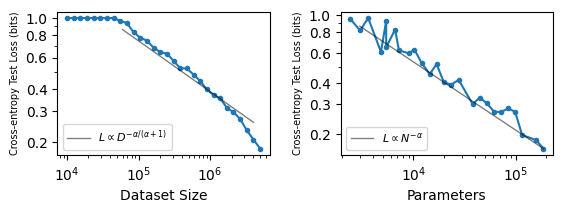

In [7]:
plt.figure(figsize=(5.5, 2))

ax = plt.subplot(1, 2, 1)
plt.plot(data_scaling_Ds, data_scaling_losses, 'o-', markersize=3)
xs = np.linspace(6e4, data_scaling_Ds[-2], 10)
ys = np.power(xs, -(data_scaling_alpha - 1)/data_scaling_alpha)
ys /= 0.8*ys[-1] / data_scaling_losses[-2]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-\alpha/(\alpha+1)}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Dataset Size")
plt.legend(prop={'size': 8}, loc='lower left')
# plt.yticks([])
yticks = [0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])

ax = plt.subplot(1, 2, 2)
plt.plot(parameter_scaling_Ps, parameter_scaling_losses, 'o-', markersize=3)
xs = np.linspace(3e3, parameter_scaling_Ps[-1], 10)
ys = np.power(xs, -(parameter_scaling_alpha - 1))
ys /= 1.0*ys[-1] / parameter_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto N^{-\alpha}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Parameters")
plt.legend(prop={'size': 8}, loc='lower left')
yticks = [0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])

plt.subplots_adjust(wspace=2.5)
plt.tight_layout(pad=0.25)
# plt.savefig("../figures/data-parameters.pdf")

In [8]:
len_Ps = len(parameter_scaling_Ps)
n_tasks = len(parameter_scaling_subtask_losses[parameter_scaling_Ps[0]])

parameter_grid = np.zeros((len_Ps, n_tasks))
for i, P in enumerate(parameter_scaling_Ps):
    parameter_grid[i, :] = np.array(parameter_scaling_subtask_losses[P])

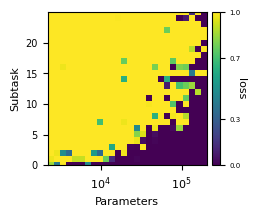

In [9]:
fig, ax = plt.subplots(figsize=(2.75, 2))
pos = ax.imshow(parameter_grid.T, vmin=0, vmax=1.0, cmap='viridis')

# do y axis log scale fancyness
P0 = parameter_scaling_Ps[0]
P1 = parameter_scaling_Ps[-1]
C = (1 / (len_Ps - 1) * np.log(P1/P0))

def i_to_P(i):
    return P0 * np.exp(C * i)
   
def P_to_i(P):
    return (1 / C) * np.log(P / P0)

plt.xlabel("Parameters", fontsize=8)
xticks = [P_to_i(P) for P in [1e4, 1e5]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$"], fontsize=8)

plt.ylim(0, 25)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20], fontsize=7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)

plt.tight_layout(pad=0.1)

In [10]:
len_Ds = len(data_scaling_Ds)
n_tasks = len(data_scaling_subtask_losses[data_scaling_Ds[0]])

data_grid = np.zeros((len_Ds, n_tasks))
for i, P in enumerate(data_scaling_Ds):
    data_grid[i, :] = np.array(data_scaling_subtask_losses[P])

Text(0, 0.5, 'loss')

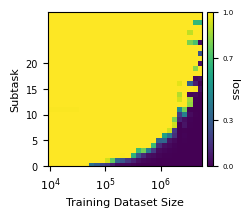

In [11]:
fig = plt.figure(figsize=(2.75, 2))
ax = plt.subplot(1, 1, 1)
pos = ax.imshow(data_grid.T, vmin=0, vmax=1.0, cmap='viridis')

# do y axis log scale fancyness
P0 = data_scaling_Ds[0]
P1 = data_scaling_Ds[-1]
C = (1 / (len_Ds - 1) * np.log(P1/P0))

def i_to_D(i):
    return P0 * np.exp(C * i)
   
def D_to_i(D):
    return (1 / C) * np.log(D / P0)

plt.xlabel("Training Dataset Size", fontsize=8)
xticks = [D_to_i(D) for D in [1e4, 1e5, 1e6]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$", "$10^6$"], fontsize=8)

plt.ylim(0, 30)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20], fontsize=7)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
# cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.02, ax.get_position().height])
cbar = plt.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)

# plt.tight_layout(pad=0.1)
# plt.savefig("../figures/subtask-scaling-data_grid.pdf")

In [12]:
divider.append_axes?

### Putting it all together...

In [13]:
len_Ds = len(data_scaling_Ds)
n_tasks = len(data_scaling_subtask_losses[data_scaling_Ds[0]])

data_grid = np.zeros((len_Ds, n_tasks))
for i, P in enumerate(data_scaling_Ds):
    data_grid[i, :] = np.array(data_scaling_subtask_losses[P])

In [14]:
len_Ps = len(parameter_scaling_Ps)
n_tasks = len(parameter_scaling_subtask_losses[parameter_scaling_Ps[0]])

parameter_grid = np.zeros((len_Ps, n_tasks))
for i, P in enumerate(parameter_scaling_Ps):
    parameter_grid[i, :] = np.array(parameter_scaling_subtask_losses[P])

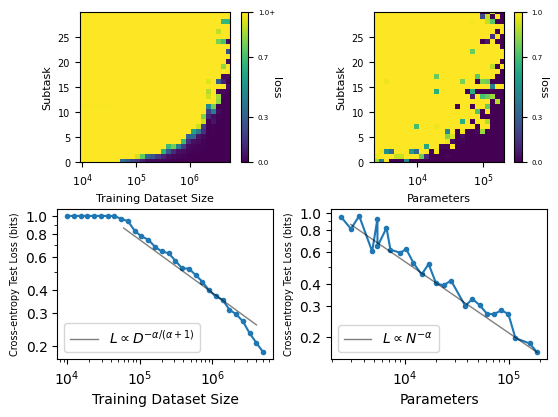

In [17]:
plt.figure(figsize=(5.5, 4.0))


ax = plt.subplot(2, 2, 1)
pos = ax.imshow(data_grid.T, vmin=0, vmax=1.0, aspect=1.0, cmap='viridis')
# do y axis log scale fancyness
P0 = data_scaling_Ds[0]
P1 = data_scaling_Ds[-1]
C = (1 / (len_Ds - 1) * np.log(P1/P0))
def i_to_D(i):
    return P0 * np.exp(C * i)
def D_to_i(D):
    return (1 / C) * np.log(D / P0)
plt.xlabel("Training Dataset Size", fontsize=8)
xticks = [D_to_i(D) for D in [1e4, 1e5, 1e6]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$", "$10^6$"], fontsize=8)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_yticklabels(["0.0", "0.3", "0.7", "1.0+"])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)
plt.ylim(0, 30)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=7)



ax = plt.subplot(2, 2, 2)
pos = ax.imshow(parameter_grid.T, vmin=0, vmax=1.0, cmap='viridis')
# do y axis log scale fancyness
P0 = parameter_scaling_Ps[0]
P1 = parameter_scaling_Ps[-1]
C = (1 / (len_Ps - 1) * np.log(P1/P0))
def i_to_P(i):
    return P0 * np.exp(C * i)
def P_to_i(P):
    return (1 / C) * np.log(P / P0)
plt.xlabel("Parameters", fontsize=8)
xticks = [P_to_i(P) for P in [1e4, 1e5]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$"], fontsize=8)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)
plt.ylim(0, 30)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=7)



ax = plt.subplot(2, 2, 3)
plt.plot(data_scaling_Ds, data_scaling_losses, 'o-', markersize=3)
xs = np.linspace(6e4, data_scaling_Ds[-2], 10)
ys = np.power(xs, -(data_scaling_alpha - 1)/data_scaling_alpha)
ys /= 0.8*ys[-1] / data_scaling_losses[-2]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-\alpha/(\alpha+1)}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Training Dataset Size")
plt.legend(prop={'size': 10}, loc='lower left')
# plt.yticks([])
yticks = [0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])

ax = plt.subplot(2, 2, 4)
plt.plot(parameter_scaling_Ps, parameter_scaling_losses, 'o-', markersize=3)
xs = np.linspace(3e3, parameter_scaling_Ps[-1], 10)
ys = np.power(xs, -(parameter_scaling_alpha - 1))
ys /= 1.0*ys[-1] / parameter_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto N^{-\alpha}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Parameters")
plt.legend(prop={'size': 10}, loc='lower left')
yticks = [0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])

plt.subplots_adjust(wspace=1.2, hspace=2.0)
plt.tight_layout(pad=0.1)
plt.savefig("../figures/data-parameters-emergence-and-scaling.pdf")

## Data from v4 of script

In [16]:
data_scaling_alphas = []
data_scaling_Ds = []
data_scaling_losses = []
data_scaling_subtask_losses = dict()
min_idxs = []
for i in tqdm(range(1, 31, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/{i}/config.json", 'r') as f:
            config = json.load(f)
            data_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/{i}/info.json", 'r') as f:
            info = json.load(f)
            min_idx = min(list(range(len(info['losses']))), key=lambda i: info['losses'][i])
            min_idxs.append(min_idx)
            data_scaling_losses.append(info['losses'][min_idx]*c)
            data_scaling_subtask_losses[info['D']] = [info['losses_subtasks'][str(i)][min_idx]*c for i in range(200)]
            data_scaling_Ds.append(info['D'])
    except Exception as e:
        print(e)

  0%|          | 0/30 [00:00<?, ?it/s]

In [5]:
assert all([x == data_scaling_alphas[0] for x in data_scaling_alphas])
data_scaling_alpha = data_scaling_alphas[0]

In [8]:
data_scaling_Ds, data_scaling_losses = zip(*sorted(list(zip(data_scaling_Ds, data_scaling_losses)), key=lambda x: x[0]))

[Text(0, 0.2, '0.2'),
 Text(0, 0.3, '0.3'),
 Text(0, 0.4, '0.4'),
 Text(0, 0.6, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0, '1.0')]

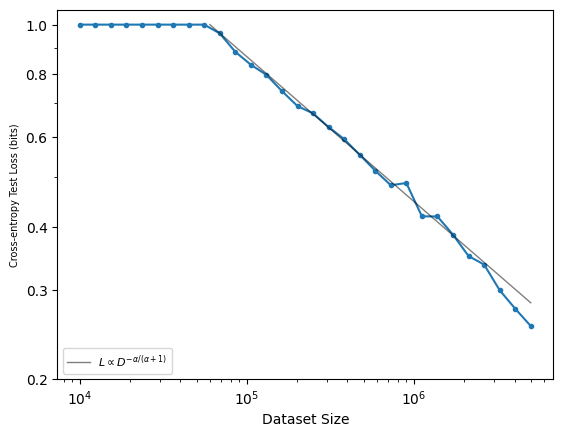

In [13]:
# plt.figure(figsize=(5.5, 2))

ax = plt.subplot(1, 1, 1)
plt.plot(data_scaling_Ds, data_scaling_losses, 'o-', markersize=3)
xs = np.linspace(6e4, data_scaling_Ds[-1], 10)
ys = np.power(xs, -(data_scaling_alpha - 1)/data_scaling_alpha)
ys /= 0.9*ys[-1] / data_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-\alpha/(\alpha+1)}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Dataset Size")
plt.legend(prop={'size': 8}, loc='lower left')
# plt.yticks([])
yticks = [0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])


In [14]:
len_Ds = len(data_scaling_Ds)
n_tasks = len(data_scaling_subtask_losses[data_scaling_Ds[0]])

data_grid = np.zeros((len_Ds, n_tasks))
for i, P in enumerate(data_scaling_Ds):
    data_grid[i, :] = np.array(data_scaling_subtask_losses[P])

Text(0, 0.5, 'loss')

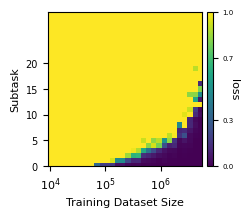

In [15]:
fig = plt.figure(figsize=(2.75, 2))
ax = plt.subplot(1, 1, 1)
pos = ax.imshow(data_grid.T, vmin=0, vmax=1.0, cmap='viridis')

# do y axis log scale fancyness
P0 = data_scaling_Ds[0]
P1 = data_scaling_Ds[-1]
C = (1 / (len_Ds - 1) * np.log(P1/P0))

def i_to_D(i):
    return P0 * np.exp(C * i)
   
def D_to_i(D):
    return (1 / C) * np.log(D / P0)

plt.xlabel("Training Dataset Size", fontsize=8)
xticks = [D_to_i(D) for D in [1e4, 1e5, 1e6]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$", "$10^6$"], fontsize=8)

plt.ylim(0, 30)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20], fontsize=7)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
# cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.02, ax.get_position().height])
cbar = plt.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)

# plt.tight_layout(pad=0.1)
# plt.savefig("../figures/subtask-scaling-data_grid.pdf")

In [17]:
min_idxs

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 7,
 6,
 6,
 11,
 10,
 13,
 16,
 14,
 21,
 21,
 21,
 38,
 26,
 32,
 28,
 61,
 42,
 52,
 80,
 95]

In [18]:
data_scaling_Ds[-1]

4999999

(0.0, 1.2)

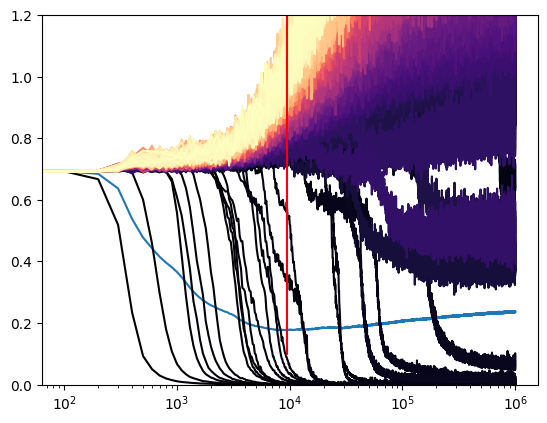

In [28]:
plt.plot(info['log_steps'], info['losses'])
colors = plt.cm.magma(np.linspace(0, 1, 500))
for i in range(500):
    plt.plot(info['log_steps'], info['losses_subtasks'][str(i)], color=colors[i])
plt.xscale('log')
# plt.yscale('log')
plt.plot([100*min_idxs[-1]]*2, [0.1, 2], color='red')
plt.ylim(0, 1.2)

### Load up new parameter scaling results `P-scaling-15`

In [6]:
parameter_scaling_alphas = []
parameter_scaling_Ps = []
parameter_scaling_losses = []
parameter_scaling_loss_curves = dict()
parameter_scaling_log_steps = dict()
parameter_scaling_subtask_losses = dict()
for i in tqdm(range(1, 45, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{i}/config.json", 'r') as f:
            config = json.load(f)
            parameter_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{i}/info.json", 'r') as f:
            info = json.load(f)
            if info['P'] in parameter_scaling_Ps:
                continue
            parameter_scaling_losses.append(info['losses'][-1]*c)
            parameter_scaling_loss_curves[info['P']] = np.array(info['losses'])*c
            parameter_scaling_log_steps[info['P']] = info['log_steps']
            parameter_scaling_subtask_losses[info['P']] = [info['losses_subtasks'][str(i)][-1]*c for i in range(500)]
            parameter_scaling_Ps.append(info['P'])
    except Exception as e:
        print(e)

assert all([x == parameter_scaling_alphas[0] for x in parameter_scaling_alphas])
parameter_scaling_alpha = parameter_scaling_alphas[0]

  0%|          | 0/44 [00:00<?, ?it/s]

Expecting ',' delimiter: line 1778962 column 25 (char 33554432)
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/14/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/24/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/25/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/26/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/27/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/38/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/39/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/40/config.json'
[Errno 2] No such file o

In [7]:
parameter_scaling_Ps, parameter_scaling_losses = zip(*sorted(list(zip(parameter_scaling_Ps, parameter_scaling_losses)), key=lambda x: x[0]))


In [8]:
len_Ps = len(parameter_scaling_Ps)
n_tasks = len(parameter_scaling_subtask_losses[parameter_scaling_Ps[0]])

parameter_grid = np.zeros((len_Ps, n_tasks))
for i, P in enumerate(parameter_scaling_Ps):
    parameter_grid[i, :] = np.array(parameter_scaling_subtask_losses[P])

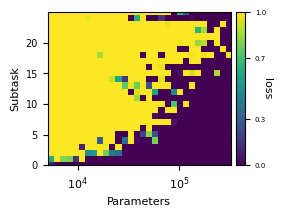

In [9]:
fig, ax = plt.subplots(figsize=(2.75, 2))
pos = ax.imshow(parameter_grid.T, vmin=0, vmax=1.0, cmap='viridis')

# do y axis log scale fancyness
P0 = parameter_scaling_Ps[0]
P1 = parameter_scaling_Ps[-1]
C = (1 / (len_Ps - 1) * np.log(P1/P0))

def i_to_P(i):
    return P0 * np.exp(C * i)
   
def P_to_i(P):
    return (1 / C) * np.log(P / P0)

plt.xlabel("Parameters", fontsize=8)
xticks = [P_to_i(P) for P in [1e4, 1e5]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$"], fontsize=8)

plt.ylim(0, 25)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20], fontsize=7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)

plt.tight_layout(pad=0.1)

[Text(0, 0.2, '0.2'),
 Text(0, 0.3, '0.3'),
 Text(0, 0.4, '0.4'),
 Text(0, 0.6, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0, '1.0')]

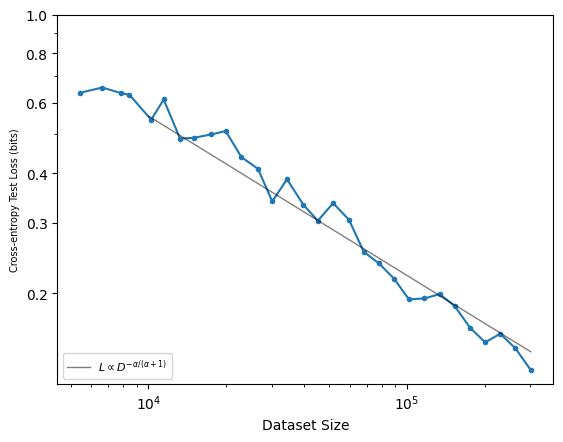

In [16]:
# plt.figure(figsize=(5.5, 2))

ax = plt.subplot(1, 1, 1)
plt.plot(parameter_scaling_Ps, parameter_scaling_losses, 'o-', markersize=3)
xs = np.linspace(1e4, parameter_scaling_Ps[-1], 10)
ys = np.power(xs, -(parameter_scaling_alpha-1))
ys /= 0.9*ys[-1] / parameter_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-\alpha/(\alpha+1)}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Dataset Size")
plt.legend(prop={'size': 8}, loc='lower left')
# plt.yticks([])
yticks = [0.2, 0.3, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])


## Create final figure (self-contained code)

In [3]:
parameter_scaling_alphas = []
parameter_scaling_Ps = []
parameter_scaling_losses = []
parameter_scaling_loss_curves = dict()
parameter_scaling_log_steps = dict()
parameter_scaling_subtask_losses = dict()
for i in tqdm(range(1, 45, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{i}/config.json", 'r') as f:
            config = json.load(f)
            parameter_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{i}/info.json", 'r') as f:
            info = json.load(f)
            if info['P'] in parameter_scaling_Ps:
                continue
            parameter_scaling_losses.append(info['losses'][-1]*c)
            parameter_scaling_loss_curves[info['P']] = np.array(info['losses'])*c
            parameter_scaling_log_steps[info['P']] = info['log_steps']
            parameter_scaling_subtask_losses[info['P']] = [info['losses_subtasks'][str(i)][-1]*c for i in range(500)]
            parameter_scaling_Ps.append(info['P'])
    except Exception as e:
        print(e)

assert all([x == parameter_scaling_alphas[0] for x in parameter_scaling_alphas])
parameter_scaling_alpha = parameter_scaling_alphas[0]

  0%|          | 0/44 [00:00<?, ?it/s]

Expecting ',' delimiter: line 1778962 column 25 (char 33554432)
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/14/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/24/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/25/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/26/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/27/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/38/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/39/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/40/config.json'
[Errno 2] No such file o

In [4]:
parameter_scaling_Ps, parameter_scaling_losses = zip(*sorted(list(zip(parameter_scaling_Ps, parameter_scaling_losses)), key=lambda x: x[0]))


In [5]:
len_Ps = len(parameter_scaling_Ps)
n_tasks = len(parameter_scaling_subtask_losses[parameter_scaling_Ps[0]])

parameter_grid = np.zeros((len_Ps, n_tasks))
for i, P in enumerate(parameter_scaling_Ps):
    parameter_grid[i, :] = np.array(parameter_scaling_subtask_losses[P])

In [6]:
data_scaling_alphas = []
data_scaling_Ds = []
data_scaling_losses = []
data_scaling_subtask_losses = dict()
min_idxs = []
for i in tqdm(range(1, 31, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/{i}/config.json", 'r') as f:
            config = json.load(f)
            data_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/{i}/info.json", 'r') as f:
            info = json.load(f)
            min_idx = min(list(range(len(info['losses']))), key=lambda i: info['losses'][i])
            min_idxs.append(min_idx)
            data_scaling_losses.append(info['losses'][min_idx]*c)
            data_scaling_subtask_losses[info['D']] = [info['losses_subtasks'][str(i)][min_idx]*c for i in range(200)]
            data_scaling_Ds.append(info['D'])
    except Exception as e:
        print(e)

  0%|          | 0/30 [00:00<?, ?it/s]

In [7]:
assert all([x == data_scaling_alphas[0] for x in data_scaling_alphas])
data_scaling_alpha = data_scaling_alphas[0]

In [8]:
data_scaling_Ds, data_scaling_losses = zip(*sorted(list(zip(data_scaling_Ds, data_scaling_losses)), key=lambda x: x[0]))

In [9]:
len_Ds = len(data_scaling_Ds)
n_tasks = len(data_scaling_subtask_losses[data_scaling_Ds[0]])

data_grid = np.zeros((len_Ds, n_tasks))
for i, P in enumerate(data_scaling_Ds):
    data_grid[i, :] = np.array(data_scaling_subtask_losses[P])

In [10]:
len_Ps = len(parameter_scaling_Ps)
n_tasks = len(parameter_scaling_subtask_losses[parameter_scaling_Ps[0]])

parameter_grid = np.zeros((len_Ps, n_tasks))
for i, P in enumerate(parameter_scaling_Ps):
    parameter_grid[i, :] = np.array(parameter_scaling_subtask_losses[P])

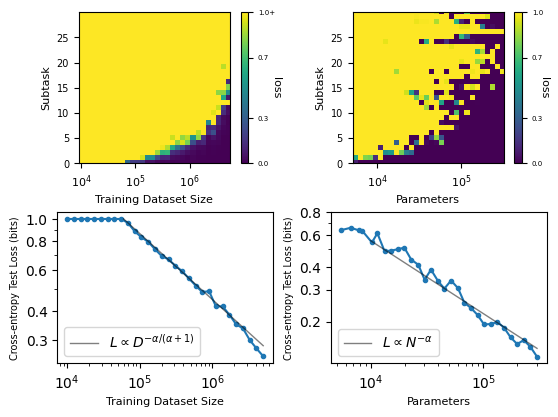

In [14]:
plt.figure(figsize=(5.5, 4.0))


ax = plt.subplot(2, 2, 1)
pos = ax.imshow(data_grid.T, vmin=0, vmax=1.0, aspect=1.0, cmap='viridis')
# do y axis log scale fancyness
P0 = data_scaling_Ds[0]
P1 = data_scaling_Ds[-1]
C = (1 / (len_Ds - 1) * np.log(P1/P0))
def i_to_D(i):
    return P0 * np.exp(C * i)
def D_to_i(D):
    return (1 / C) * np.log(D / P0)
plt.xlabel("Training Dataset Size", fontsize=8)
xticks = [D_to_i(D) for D in [1e4, 1e5, 1e6]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$", "$10^6$"], fontsize=8)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_yticklabels(["0.0", "0.3", "0.7", "1.0+"])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)
plt.ylim(0, 30)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=7)



ax = plt.subplot(2, 2, 2)
pos = ax.imshow(parameter_grid.T, vmin=0, vmax=1.0, cmap='viridis')
# do y axis log scale fancyness
P0 = parameter_scaling_Ps[0]
P1 = parameter_scaling_Ps[-1]
C = (1 / (len_Ps - 1) * np.log(P1/P0))
def i_to_P(i):
    return P0 * np.exp(C * i)
def P_to_i(P):
    return (1 / C) * np.log(P / P0)
plt.xlabel("Parameters", fontsize=8)
xticks = [P_to_i(P) for P in [1e4, 1e5]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$"], fontsize=8)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)
plt.ylim(0, 30)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=7)



ax = plt.subplot(2, 2, 3)
plt.plot(data_scaling_Ds, data_scaling_losses, 'o-', markersize=3)
xs = np.linspace(6e4, data_scaling_Ds[-1], 10)
ys = np.power(xs, -(data_scaling_alpha - 1)/data_scaling_alpha)
ys /= 0.9*ys[-1] / data_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-\alpha/(\alpha+1)}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Training Dataset Size", fontsize=8)
plt.legend(prop={'size': 10}, loc='lower left')
# plt.yticks([])
yticks = [0.3, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])

ax = plt.subplot(2, 2, 4)
plt.plot(parameter_scaling_Ps, parameter_scaling_losses, 'o-', markersize=3)
xs = np.linspace(1e4, parameter_scaling_Ps[-1], 10)
ys = np.power(xs, -(parameter_scaling_alpha - 1))
ys /= 0.9*ys[-1] / parameter_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto N^{-\alpha}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Parameters", fontsize=8)
plt.legend(prop={'size': 10}, loc='lower left')
yticks = [0.2, 0.3, 0.4, 0.6, 0.8]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])

plt.subplots_adjust(wspace=1.2, hspace=2.0)
plt.tight_layout(pad=0.1)
# plt.savefig("../figures/data-parameters-emergence-and-scaling.pdf")

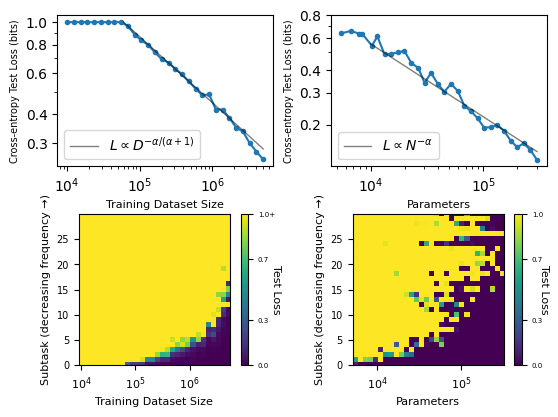

In [11]:
plt.figure(figsize=(5.5, 4.0))


ax = plt.subplot(2, 2, 3)
pos = ax.imshow(data_grid.T, vmin=0, vmax=1.0, aspect=1.0, cmap='viridis')
# do y axis log scale fancyness
P0 = data_scaling_Ds[0]
P1 = data_scaling_Ds[-1]
C = (1 / (len_Ds - 1) * np.log(P1/P0))
def i_to_D(i):
    return P0 * np.exp(C * i)
def D_to_i(D):
    return (1 / C) * np.log(D / P0)
plt.xlabel("Training Dataset Size", fontsize=8)
xticks = [D_to_i(D) for D in [1e4, 1e5, 1e6]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$", "$10^6$"], fontsize=8)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_yticklabels(["0.0", "0.3", "0.7", "1.0+"])
cbar.ax.set_ylabel('Test Loss', rotation=270, fontsize=8)
plt.ylim(0, 30)
plt.ylabel("Subtask (decreasing frequency →)", fontsize=8)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=7)



ax = plt.subplot(2, 2, 4)
pos = ax.imshow(parameter_grid.T, vmin=0, vmax=1.0, cmap='viridis')
# do y axis log scale fancyness
P0 = parameter_scaling_Ps[0]
P1 = parameter_scaling_Ps[-1]
C = (1 / (len_Ps - 1) * np.log(P1/P0))
def i_to_P(i):
    return P0 * np.exp(C * i)
def P_to_i(P):
    return (1 / C) * np.log(P / P0)
plt.xlabel("Parameters", fontsize=8)
xticks = [P_to_i(P) for P in [1e4, 1e5]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$"], fontsize=8)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_ylabel('Test Loss', rotation=270, fontsize=8)
plt.ylim(0, 30)
plt.ylabel("Subtask (decreasing frequency →)", fontsize=8)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=7)



ax = plt.subplot(2, 2, 1)
plt.plot(data_scaling_Ds, data_scaling_losses, 'o-', markersize=3)
xs = np.linspace(6e4, data_scaling_Ds[-1], 10)
ys = np.power(xs, -(data_scaling_alpha - 1)/data_scaling_alpha)
ys /= 0.9*ys[-1] / data_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto D^{-\alpha/(\alpha+1)}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Training Dataset Size", fontsize=8)
plt.legend(prop={'size': 10}, loc='lower left')
# plt.yticks([])
yticks = [0.3, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])

ax = plt.subplot(2, 2, 2)
plt.plot(parameter_scaling_Ps, parameter_scaling_losses, 'o-', markersize=3)
xs = np.linspace(1e4, parameter_scaling_Ps[-1], 10)
ys = np.power(xs, -(parameter_scaling_alpha - 1))
ys /= 0.9*ys[-1] / parameter_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, alpha=0.5, label=r"$L \propto N^{-\alpha}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=7)
plt.xlabel("Parameters", fontsize=8)
plt.legend(prop={'size': 10}, loc='lower left')
yticks = [0.2, 0.3, 0.4, 0.6, 0.8]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks])

plt.subplots_adjust(wspace=1.2, hspace=2.0)
plt.tight_layout(pad=0.1)
# plt.savefig("../figures/data-parameters-emergence-and-scaling-scalingtop.pdf")

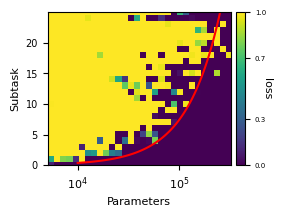

In [27]:
fig, ax = plt.subplots(figsize=(2.75, 2))
pos = ax.imshow(parameter_grid.T, vmin=0, vmax=1.0, cmap='viridis')

# do y axis log scale fancyness
P0 = parameter_scaling_Ps[0]
P1 = parameter_scaling_Ps[-1]
C = (1 / (len_Ps - 1) * np.log(P1/P0))

def i_to_P(i):
    return P0 * np.exp(C * i)
   
def P_to_i(P):
    return (1 / C) * np.log(P / P0)

plt.xlabel("Parameters", fontsize=8)
xticks = [P_to_i(P) for P in [1e4, 1e5]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$"], fontsize=8)

plt.ylim(0, 25)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20], fontsize=7)

xs = np.linspace(P_to_i(1e4), P_to_i(3e5), 100)
ys = np.exp((xs - 10)/ 5.5)
plt.plot(xs, ys, color='red')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)

plt.tight_layout(pad=0.1)

([<matplotlib.axis.YTick at 0x2b54c42c2eb0>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25')])

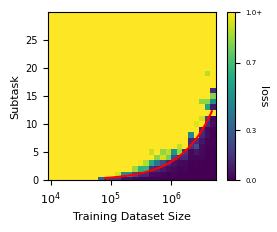

In [54]:
ax = plt.subplot(2, 2, 1)
pos = ax.imshow(data_grid.T, vmin=0, vmax=1.0, aspect=1.0, cmap='viridis')
# do y axis log scale fancyness
P0 = data_scaling_Ds[0]
P1 = data_scaling_Ds[-1]
C = (1 / (len_Ds - 1) * np.log(P1/P0))
def i_to_D(i):
    return P0 * np.exp(C * i)
def D_to_i(D):
    return (1 / C) * np.log(D / P0)
plt.xlabel("Training Dataset Size", fontsize=8)
xticks = [D_to_i(D) for D in [1e4, 1e5, 1e6]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$", "$10^6$"], fontsize=8)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.3, 0.7, 1.0])
cbar.ax.set_yticklabels(["0.0", "0.3", "0.7", "1.0+"])
cbar.ax.set_ylabel('loss', rotation=270, fontsize=8)

xs = np.linspace(P_to_i(8e4), P_to_i(4.8e6), 100)
ys = np.exp((xs - 15) / 5.5)
plt.plot(xs, ys, color='red')

plt.ylim(0, 30)
plt.ylabel("Subtask", fontsize=8)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=7)

# Make this plot for data scaling in time (steps S)

In [3]:
parameter_scaling_alphas = []
parameter_scaling_Ps = []
parameter_scaling_losses = []
parameter_scaling_loss_curves = dict()
parameter_scaling_log_steps = dict()
parameter_scaling_subtask_losses = dict()
parameter_scaling_exp_ids = []
for i in tqdm(range(1, 45, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{i}/config.json", 'r') as f:
            config = json.load(f)
            parameter_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{i}/info.json", 'r') as f:
            info = json.load(f)
            if info['P'] in parameter_scaling_Ps:
                continue
            parameter_scaling_losses.append(info['losses'][-1]*c)
            parameter_scaling_loss_curves[info['P']] = np.array(info['losses'])*c
            parameter_scaling_log_steps[info['P']] = info['log_steps']
            parameter_scaling_subtask_losses[info['P']] = [info['losses_subtasks'][str(i)][-1]*c for i in range(500)]
            parameter_scaling_Ps.append(info['P'])
            parameter_scaling_exp_ids.append(i)
    except Exception as e:
        print(e)

assert all([x == parameter_scaling_alphas[0] for x in parameter_scaling_alphas])
parameter_scaling_alpha = parameter_scaling_alphas[0]
parameter_scaling_Ps, parameter_scaling_losses, parameter_scaling_exp_ids = zip(*sorted(list(zip(parameter_scaling_Ps, parameter_scaling_losses, parameter_scaling_exp_ids)), key=lambda x: x[0]))


  0%|          | 0/44 [00:00<?, ?it/s]

Expecting ',' delimiter: line 1778962 column 25 (char 33554432)
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/14/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/24/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/25/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/26/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/27/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/38/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/39/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/40/config.json'
[Errno 2] No such file o

In [4]:
data_scaling_alphas = []
data_scaling_Ds = []
data_scaling_losses = []
data_scaling_subtask_losses = dict()
min_idxs = []
for i in tqdm(range(1, 31, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/{i}/config.json", 'r') as f:
            config = json.load(f)
            data_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/{i}/info.json", 'r') as f:
            info = json.load(f)
            min_idx = min(list(range(len(info['losses']))), key=lambda i: info['losses'][i])
            min_idxs.append(min_idx)
            data_scaling_losses.append(info['losses'][min_idx]*c)
            data_scaling_subtask_losses[info['D']] = [info['losses_subtasks'][str(i)][min_idx]*c for i in range(200)]
            data_scaling_Ds.append(info['D'])
    except Exception as e:
        print(e)

assert all([x == data_scaling_alphas[0] for x in data_scaling_alphas])
data_scaling_alpha = data_scaling_alphas[0]

data_scaling_Ds, data_scaling_losses = zip(*sorted(list(zip(data_scaling_Ds, data_scaling_losses)), key=lambda x: x[0]))

  0%|          | 0/30 [00:00<?, ?it/s]

In [5]:
len_Ps = len(parameter_scaling_Ps)
n_tasks = len(parameter_scaling_subtask_losses[parameter_scaling_Ps[0]])

parameter_grid = np.zeros((len_Ps, n_tasks))
for i, P in enumerate(parameter_scaling_Ps):
    parameter_grid[i, :] = np.array(parameter_scaling_subtask_losses[P])

In [6]:
len_Ds = len(data_scaling_Ds)
n_tasks = len(data_scaling_subtask_losses[data_scaling_Ds[0]])

data_grid = np.zeros((len_Ds, n_tasks))
for i, P in enumerate(data_scaling_Ds):
    data_grid[i, :] = np.array(data_scaling_subtask_losses[P])

In [7]:
exp_id = parameter_scaling_exp_ids[-1]
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{exp_id}/config.json", 'r') as f:
    config = json.load(f)
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{exp_id}/info.json", 'r') as f:
    info = json.load(f)

assert config['n_tasks'] == len(info['losses_subtasks'])

len_Ss = len(info['losses'])
n_tasks = config['n_tasks']

S_grid = np.zeros((len_Ss, n_tasks))
for i in range(n_tasks):
    s = str(i)
    S_grid[:, i] = np.array(info['losses_subtasks'][s]) * c

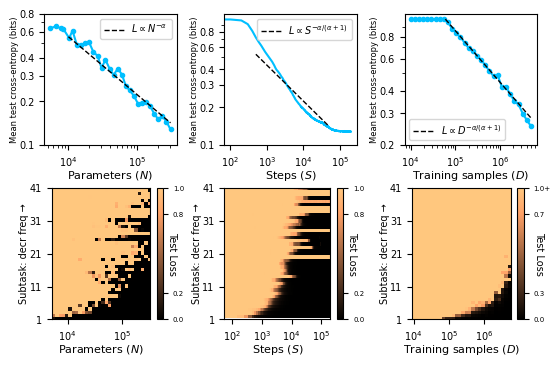

In [11]:
plt.figure(figsize=(5.5, 3.5))

ax = plt.subplot(2, 3, 1)
plt.plot(parameter_scaling_Ps, parameter_scaling_losses, 'o-', markersize=3, color='deepskyblue')
xs = np.linspace(1e4, parameter_scaling_Ps[-1], 10)
ys = np.power(xs, -(parameter_scaling_alpha - 1))
ys /= 0.9*ys[-1] / parameter_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, linestyle='dashed', label=r"$L \propto N^{-\alpha}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Mean test cross-entropy (bits)", fontsize=6, labelpad=0)
plt.xlabel("Parameters ($N$)", fontsize=8, labelpad=0)
plt.legend(prop={'size': 7}, loc='upper right')
yticks = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8]
plt.yticks(yticks, yticks, fontsize=7)
plt.xticks(fontsize=7)
# ax.set_yticks(yticks)
# ax.set_yticklabels([str(y) for y in yticks])

ax = plt.subplot(2, 3, 2)
plt.plot(info['log_steps'], np.array(info['losses'])*c, color='deepskyblue')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Mean test cross-entropy (bits)", fontsize=6, labelpad=0)
plt.xlabel("Steps ($S$)", fontsize=8, labelpad=0)
xs = np.linspace(1e3, 1e5, 1000)
# xs = np.linspace(1e4, parameter_scaling_Ps[-1], 10)
ys = np.power(xs, -(parameter_scaling_alpha - 1) / parameter_scaling_alpha)
ys *= info['losses'][info['log_steps'].index(1000)]*c / ys[0]
plt.plot(xs/2, ys, color='black', linewidth=1, linestyle='dashed', label=r"$L \propto S^{-\alpha/(\alpha+1)}$")
plt.legend(prop={'size': 7}, loc='upper right')
yticks = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8]
plt.yticks(yticks, yticks, fontsize=7)
plt.xticks([100, 1000, 10000, 100000], ["$10^2$", "$10^3$", "$10^4$", "$10^5$"], fontsize=7)

ax = plt.subplot(2, 3, 3)
plt.plot(data_scaling_Ds, data_scaling_losses, 'o-', markersize=3, color='deepskyblue')
xs = np.linspace(6e4, data_scaling_Ds[-1], 10)
ys = np.power(xs, -(data_scaling_alpha - 1)/data_scaling_alpha)
ys /= 0.9*ys[-1] / data_scaling_losses[-1]
plt.plot(xs, ys, color='black', linewidth=1, linestyle='dashed', label=r"$L \propto D^{-\alpha/(\alpha+1)}$")
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Mean test cross-entropy (bits)", fontsize=6, labelpad=0)
plt.xlabel("Training samples ($D$)", fontsize=8, labelpad=0)
plt.legend(prop={'size': 7}, loc='lower left')
# plt.yticks([])
yticks = [0.2, 0.3, 0.4, 0.6, 0.8]
plt.yticks(yticks, yticks, fontsize=7)
plt.xticks(fontsize=7)



ax = plt.subplot(2, 3, 4)
pos = ax.imshow(parameter_grid.T, vmin=0, vmax=1.0, cmap='copper')
# do y axis log scale fancyness
P0 = parameter_scaling_Ps[0]
P1 = parameter_scaling_Ps[-1]
C = (1 / (len_Ps - 1) * np.log(P1/P0))
def i_to_P(i):
    return P0 * np.exp(C * i)
def P_to_i(P):
    return (1 / C) * np.log(P / P0)
plt.xlabel("Parameters ($N$)", fontsize=8, labelpad=0)
xticks = [P_to_i(P) for P in [1e4, 1e5]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$"], fontsize=7)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.2, 0.8, 1.0])
cbar.ax.set_ylabel('Test Loss', rotation=270, fontsize=7, labelpad=-5)
plt.ylim(0, 40)
plt.ylabel("Subtask: decr freq →", fontsize=7, labelpad=0)
plt.yticks([0, 10, 20, 30, 40], ["1", "11", "21", "31", "41"], fontsize=7)


ax = plt.subplot(2, 3, 5)
x = np.log(np.array(info['log_steps'])+1)
y = np.linspace(1, n_tasks, n_tasks)
# Create a meshgrid with the x and y coordinates.
X, Y = np.meshgrid(x, y)
# Plot using pcolormesh with the log-spaced x coordinates and only the first 'width' columns of the grid.
pos = plt.pcolormesh(X, Y, S_grid.T, cmap='copper', vmin=0, vmax=1.0, shading='auto')
xticks = [1, 10, 100, 1000, 10000, 100000]
plt.xticks(np.log(xticks), [f"$10^{int(np.log10(x))}$" for x in xticks], fontsize=7)
plt.ylim(1, 40)
plt.xlim(4, None)
plt.yticks([0, 10, 20, 30, 40], ["1", "11", "21", "31", "41"], fontsize=7)
plt.ylabel("Subtask: decr freq →", fontsize=7, labelpad=0)
plt.xlabel("Steps ($S$)", fontsize=8, labelpad=0)
# plt.ylim(0, height)
# plt.xlim(1, np.log10(width+1))
# plt.xscale('log')
# pos = ax.imshow(parameter_grid.T, vmin=0, vmax=1.0, cmap='viridis')
# # do y axis log scale fancyness
# P0 = parameter_scaling_Ps[0]
# P1 = parameter_scaling_Ps[-1]
# C = (1 / (len_Ps - 1) * np.log(P1/P0))
# def i_to_P(i):
#     return P0 * np.exp(C * i)
# def P_to_i(P):
#     return (1 / C) * np.log(P / P0)
# plt.xlabel("Parameters", fontsize=8)
# xticks = [P_to_i(P) for P in [1e4, 1e5]]
# ax.set_xticks(xticks)
# ax.set_xticklabels(["$10^4$", "$10^5$"], fontsize=8)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.2, 0.8, 1.0])
cbar.ax.set_ylabel('Test Loss', rotation=270, fontsize=7, labelpad=-5)
# plt.ylim(0, 30)
# plt.ylabel("Subtask (decreasing frequency →)", fontsize=8)
# plt.yticks([0, 5, 10, 15, 20, 25], fontsize=7)


ax = plt.subplot(2, 3, 6)
pos = ax.imshow(data_grid.T, vmin=0, vmax=1.0, aspect=1.0, cmap='copper')
# do y axis log scale fancyness
P0 = data_scaling_Ds[0]
P1 = data_scaling_Ds[-1]
C = (1 / (len_Ds - 1) * np.log(P1/P0))
def i_to_D(i):
    return P0 * np.exp(C * i)
def D_to_i(D):
    return (1 / C) * np.log(D / P0)
plt.xlabel("Training samples ($D$)", fontsize=8, labelpad=0)
xticks = [D_to_i(D) for D in [1e4, 1e5, 1e6]]
ax.set_xticks(xticks)
ax.set_xticklabels(["$10^4$", "$10^5$", "$10^6$"], fontsize=7)
cbar = plt.colorbar(pos)
cbar.ax.tick_params(labelsize=5)
cbar.ax.set_yticks([0, 0.2, 0.8, 1.0])
cbar.ax.set_yticklabels(["0.0", "0.3", "0.7", "1.0+"])
cbar.ax.set_ylabel('Test Loss', rotation=270, fontsize=7, labelpad=-5)
plt.ylim(0, 40)
plt.ylabel("Subtask: decr freq →", fontsize=7, labelpad=0)
plt.yticks([0, 10, 20, 30, 40], ["1", "11", "21", "31", "41"], fontsize=7)


# plt.subplots_adjust(wspace=1.2, hspace=2.0)
plt.subplots_adjust(wspace=1.0)
plt.tight_layout(pad=0.1)
# plt.savefig("../figures/parameters-steps-data-emergence-and-scaling-scalingtop.pdf")
plt.savefig("../figures/parameters-steps-data-emergence-and-scaling-scalingtop.png", dpi=300)


(0.0, 1000.0)

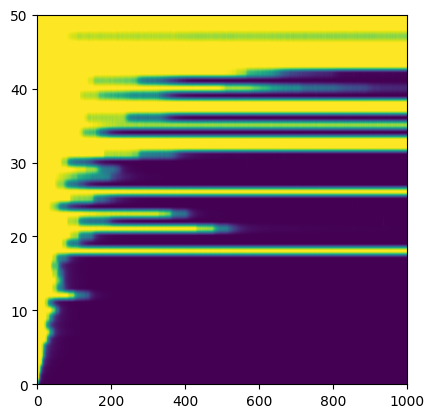

In [30]:
height = 50
width = 1000
plt.imshow(S_grid.T, cmap='viridis', vmin=0, vmax=1.0, aspect=width/height)
plt.ylim(0, height)
plt.xlim(0, width)
# plt.xscale('log')

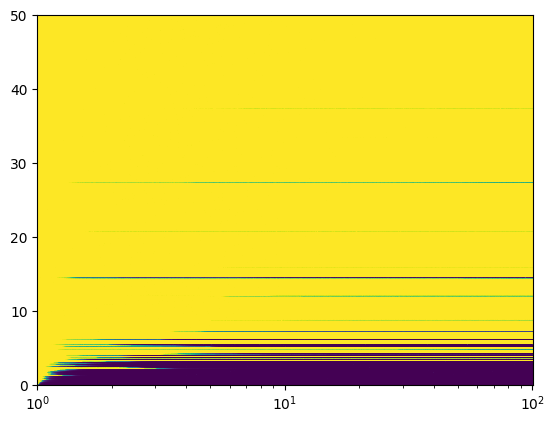

In [35]:
height = 50
width = 100

# Generate log-spaced x coordinates.
x = np.logspace(np.log10(1), np.log10(width+1), len_Ss+1)
y = np.linspace(0, height, n_tasks+1)

# Create a meshgrid with the x and y coordinates.
X, Y = np.meshgrid(x, y)

# Plot using pcolormesh with the log-spaced x coordinates.
plt.pcolormesh(X, Y, S_grid.T, cmap='viridis', vmin=0, vmax=1.0, shading='auto')

plt.ylim(0, height)
plt.xlim(1, width+1)
plt.xscale('log')

(1.0, 2.699837725867246)

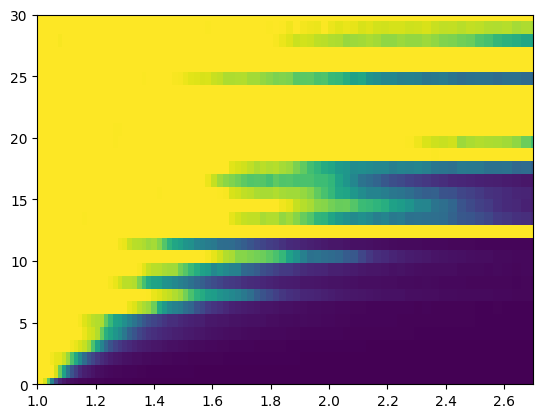

In [48]:
height = 30
width = 500

# Generate log-spaced x coordinates.
x = np.log(np.linspace(1, width+1, len_Ss+1))
x = np.logspace(np.log10(1), np.log10(width+1), width)
y = np.linspace(0, height, height)

# Create a meshgrid with the x and y coordinates.
X, Y = np.meshgrid(x, y)

# Plot using pcolormesh with the log-spaced x coordinates and only the first 'width' columns of the grid.
plt.pcolormesh(X, Y, S_grid[:width, :height].T, cmap='viridis', vmin=0, vmax=1.0, shading='auto')

plt.ylim(0, height)
plt.xlim(1, np.log10(width+1))
# plt.xscale('log')


(4.0, 12.20582770937131)

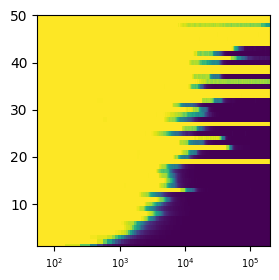

In [77]:
plt.figure(figsize=(3, 3))
# Generate log-spaced x coordinates.
x = np.log(np.array(info['log_steps'])+1)
y = np.linspace(1, n_tasks, n_tasks)

# Create a meshgrid with the x and y coordinates.
X, Y = np.meshgrid(x, y)

# Plot using pcolormesh with the log-spaced x coordinates and only the first 'width' columns of the grid.
plt.pcolormesh(X, Y, S_grid.T, cmap='viridis', vmin=0, vmax=1.0, shading='auto')

xticks = [1, 10, 100, 1000, 10000, 100000]
plt.xticks(np.log(xticks), [f"$10^{int(np.log10(x))}$" for x in xticks], fontsize=7)

plt.ylim(1, 50)
plt.xlim(4, None)

# plt.ylim(0, height)
# plt.xlim(1, np.log10(width+1))
# plt.xscale('log')


In [57]:
np.log(np.array(info['log_steps'])+1)

array([ 0.        ,  4.61512052,  5.30330491, ..., 12.20457653,
       12.20507715, 12.20557752])

In [39]:
S_grid[:width, :]

(1000, 500)

In [36]:
plt.pcolormesh?

Signature:
plt.pcolormesh(
    *args,
    alpha=None,
    norm=None,
    cmap=None,
    vmin=None,
    vmax=None,
    shading=None,
    antialiased=False,
    data=None,
    **kwargs,
)
Docstring:
Create a pseudocolor plot with a non-regular rectangular grid.

Call signature::

    pcolormesh([X, Y,] C, **kwargs)

*X* and *Y* can be used to specify the corners of the quadrilaterals.

.. hint::

   `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
   and preferred in most cases. For a detailed discussion on the
   differences see :ref:`Differences between pcolor() and pcolormesh()
   <differences-pcolor-pcolormesh>`.

Parameters
----------
C : 2D array-like
    The color-mapped values.  Color-mapping is controlled by *cmap*,
    *norm*, *vmin*, and *vmax*.

X, Y : array-like, optional
    The coordinates of the corners of quadrilaterals of a pcolormesh::

        (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                              +-----+
            

In [23]:
info['log_steps']

[0,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300,
 3400,
 3500,
 3600,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4600,
 4700,
 4800,
 4900,
 5000,
 5100,
 5200,
 5300,
 5400,
 5500,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400,
 8500,
 8600,
 8700,
 8800,
 8900,
 9000,
 9100,
 9200,
 9300,
 9400,
 9500,
 9600,
 9700,
 9800,
 9900,
 10000,
 10100,
 10200,
 10300,
 10400,
 10500,
 10600,
 10700,
 10800,
 10900,
 11000,
 11100,
 11200,
 11300,
 11400,
 11500,
 11600,
 11700,
 11800,
 11900,
 12000,
 12100,
 12200,
 12300,
 12400,
 12500,
 12600,
 12700,
 12800,
 12900,
 13000,
 13100,
 13200,
 13300,
 13400,
 13500,
 13600,
 13700,
 13800,
